In [18]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

nobel = pd.read_csv('data/nobel.csv')    # /data/nobel.csv doesn't work

In [19]:
# What is the most commonly awarded gender and birth country?
top_gender = nobel["sex"].value_counts().index[0]
top_country = nobel["birth_country"].value_counts().index[0]

print("The gender with the most Nobel laureates is :", top_gender)
print("The most common birth country of Nobel laureates is :", top_country)

The gender with the most Nobel laureates is : Male
The most common birth country of Nobel laureates is : United States of America


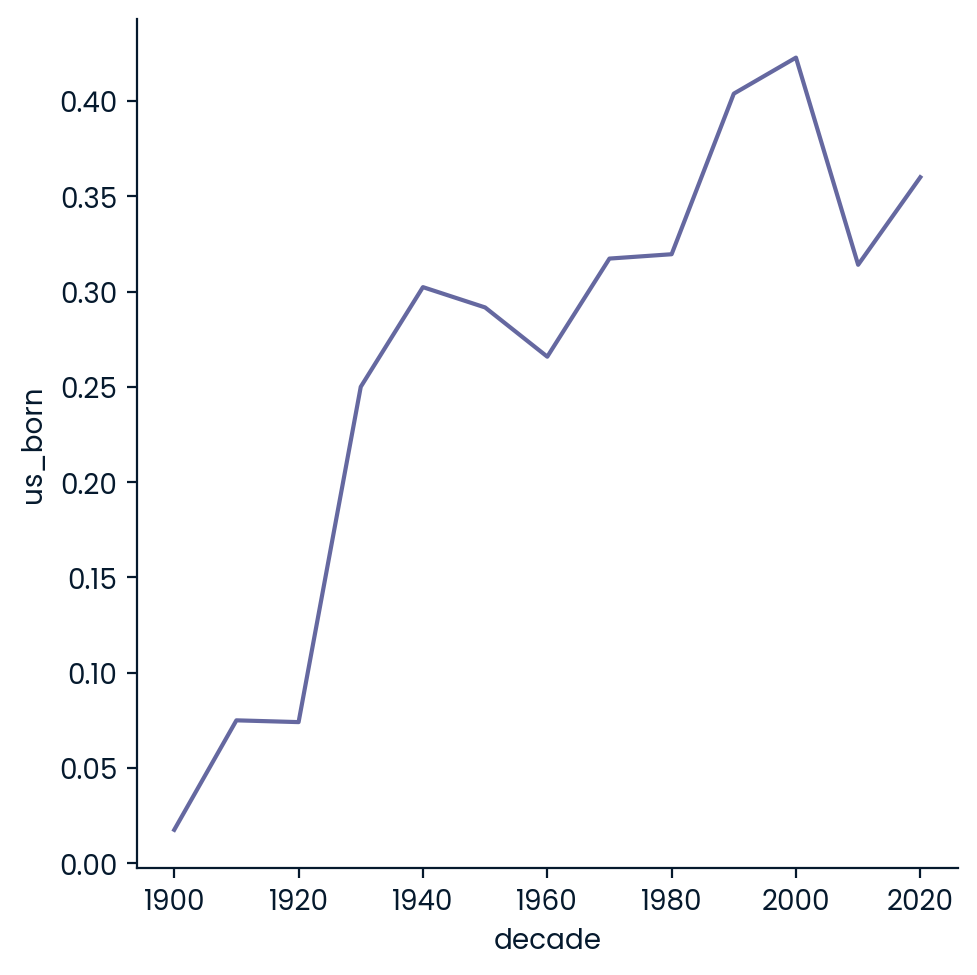

In [27]:
# Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

nobel["us_born"] = nobel['birth_country']=='United States of America'
nobel["decade"] = np.floor(nobel['year']/10)*10
ratio = nobel.groupby("decade", as_index=False)["us_born"].mean()
max_decade_usa = nobel.groupby("decade")["us_born"].mean().sort_values(ascending=False).index[0].astype('int')

sns.relplot(x='decade', y='us_born', data=ratio, kind='line')

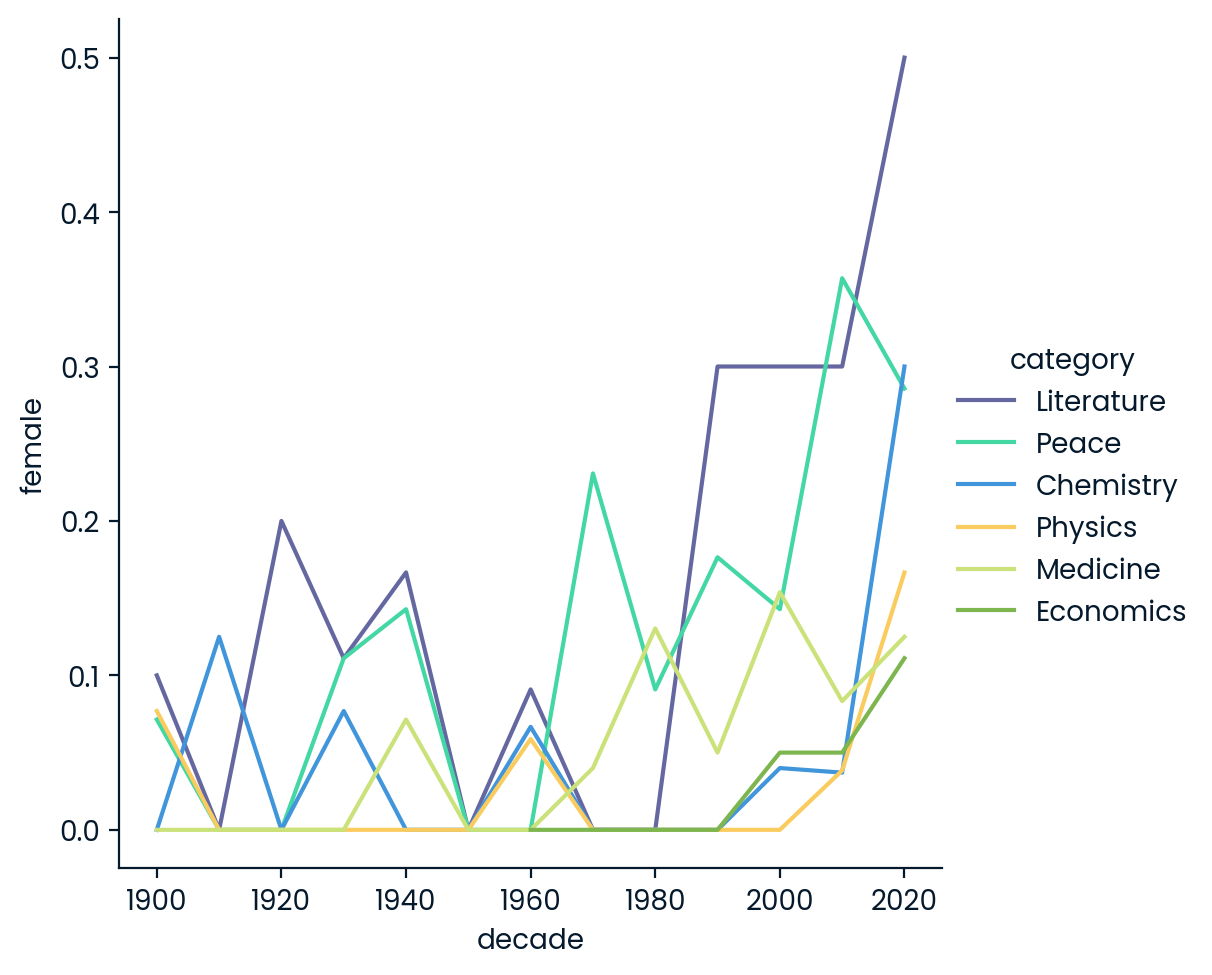

In [29]:
# Which decade and category combination had the highest proportion of female laureates?

nobel['female'] = nobel['sex']=='Female'
max_female = nobel.groupby(['decade', 'category'], as_index=False)['female'].mean().sort_values(by='female',ascending=False)
max_female_dict = {max_female['decade'].values[0] : max_female['category'].values[0]}

sns.relplot(x='decade', y='female', hue='category', data=max_female, kind='line')

In [12]:
# Who was the first woman to receive a Nobel Prize, and in what category?

first_woman = nobel.sort_values(by='year').query('sex=="Female"').head(1)

first_woman_name = first_woman['full_name'].values[0]
first_woman_category = first_woman['category'].values[0]

print("The first woman to win a Nobel Prize was {first_woman_name}, in the category of {first_woman_category}.")


 The first woman to win a Nobel Prize was Marie Curie, née Sklodowska, in the category of Physics.


In [13]:
# Which individuals or organizations have won more than one Nobel Prize throughout the years?

repeat_winner = nobel["full_name"].value_counts()
repeat_list = list(repeat_winner[repeat_winner>=2].index)

print("The repeat winners are :", repeat_list)


 The repeat winners are : ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
